## Step 1: Define the Problem Statement

I'm excited to embark on a project where I'll be using machine learning to predict the prices of laptops based on their specifications. In this project, my goal is to provide users with accurate price estimates for laptops, considering various factors such as brand, screen size, CPU, RAM, storage, GPU, and operating system.

1.1 Problem Type and Industry Understanding:

I'm dealing with a supervised machine learning problem. I have a dataset that contains information about different laptops and their corresponding prices. My task is to develop a model that can predict laptop prices based on this dataset.

1.2 Business Objective and Desired Outcome:

My objective is to empower consumers to make informed decisions when purchasing laptops. I aim to create a robust machine learning model that can predict laptop prices with a high degree of accuracy.

1.3 Constraints and Limitations:

I have limited computational resources since I'm working on my personal laptop.
I need to adhere to budget constraints and cannot access expensive data or computational resources.
The dataset may not cover all laptop brands and models, which could limit the model's generalization.

1.4 Evaluation Metrics:

I will evaluate the model's performance using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). These metrics will help me assess how closely the model's predictions align with the actual laptop prices.

1.5 Relevance to the Target Audience:

The predictions generated by my model should be fast and efficient because users will want quick estimates when comparing different laptop options.

1.6 Data Availability and Features:

I have access to a dataset that includes laptop features (brand, screen size, CPU, RAM, storage, GPU, OS) and their corresponding prices. This dataset serves as the foundation for building my model.

1.7 Scope of the Solution:

The scope of my solution is to create a laptop price prediction model that can handle laptops from various brands and configurations. It will provide users with estimated laptop prices based on the specifications they input.

1.8 Deployment Considerations:

I plan to deploy the model as a web application, allowing users to input laptop specifications and receive real-time price estimates.

## Step 2: Data Collection

In this step, I will gather the necessary data to train and test my laptop price prediction model. The dataset I will use contains information about various laptops, including their specifications and corresponding prices.

2.1 Source Identification:

I will identify reliable sources from which I can obtain the laptop dataset. Since I'm starting with a dataset, I'll ensure that it is a reputable and reliable source. In this case, I got this dataset by searching from various websites on google.

2.2 Data Volume Required:

I will specify the amount of data I need for effective analysis. For this project, I have access to a dataset containing 1304 laptop records. This dataset will serve as the foundation for training and evaluating my model.

2.3 Data Types:

I will classify the data as labeled since it includes both laptop specifications (features) and their corresponding prices (target variable). This labeling allows for supervised learning, where the model can learn to predict laptop prices based on known data.

2.4 Data Quality:

I will assess the quality of the dataset, checking for errors, biases, and maintaining data consistency. If any data quality issues are identified during this process, I will address them in the data preprocessing phase.

2.5 Data Relevancy:

I will ensure that the collected data is directly relevant to the problem I am addressing. The dataset contains information about laptop features (brand, screen size, CPU, RAM, storage, GPU, OS) and laptop prices, making it highly relevant to my price prediction task.

2.6 Temporal Considerations:

I will account for any time-related effects, seasonality, or changes in the data, if applicable. In this project, the dataset does not include temporal data, so this consideration may not be relevant.

2.7 Legal and Ethical Concerns:

I will review and address any legal and ethical concerns related to data privacy and usage. Since I am using a provided dataset, I will ensure that I have the necessary permissions to use it for this project and that I adhere to data privacy regulations.

2.8 Sampling Strategy:

I will not use sampling in this project since I have access to the entire dataset. However, if the dataset were extremely large, I might consider using a random sample for initial exploratory analysis.

2.9 Data Privacy:

I will apply appropriate techniques to handle sensitive or private information, even though the dataset does not contain such information.

2.10 Data Collection Tools:

I will not need data collection tools in this project, as the dataset has already been provided.

2.11 Data Versioning:

I will implement data version control to manage any changes or updates to the dataset. This ensures that I am working with a consistent dataset throughout the project.

2.12 Continuous Data Collection:

Since this project is based on a static dataset, I will not continuously collect data. However, in a real-world scenario, continuous data collection could be considered to improve model accuracy.

## Step 3: Data Preprocessing

In [ ]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
# Load the Dataset

data = pd.read_csv('/content/sample_data/laptop_data.csv')

In [ ]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
data.shape

(1303, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
# make a copy of dataframe

df = data.copy()

In [ ]:
# remove unnamed column in dataset

df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Check for duplicate values in the dataset.

In [ ]:
# check for duplicates

df.duplicated().sum()

29

No duplicates found so no need to handle and applying duplicate removal methods.

Null values check in this dataset.

In [ ]:
# Check null values

df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

We can clearly see that no null values found in this dataset.

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
545,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,2.1kg,37589.0400
608,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Intel HD Graphics 630,Windows 10,2kg,69210.7200
966,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.9kg,43956.0000
1123,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.09kg,27899.0064
703,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.1kg,33110.8560


we can see that 'Ram' column contains 'GB' suffix due to which we cannot cannot convert it from object to int. So, we have to remove this suffix.

In [ ]:
# remove 'GB' suffix from Ram column and 'kg' from weight column to convert it from object to int or float

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
# check datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [ ]:
# convert datatype of Ram and Weight column

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Step 4: Exploratory Data Analysis (EDA)

Let understand some important distributions and relations using some visualizations.

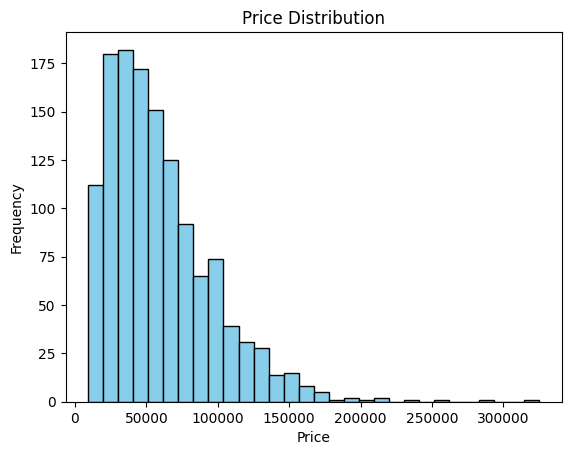

In [ ]:
# check the price distribution

plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

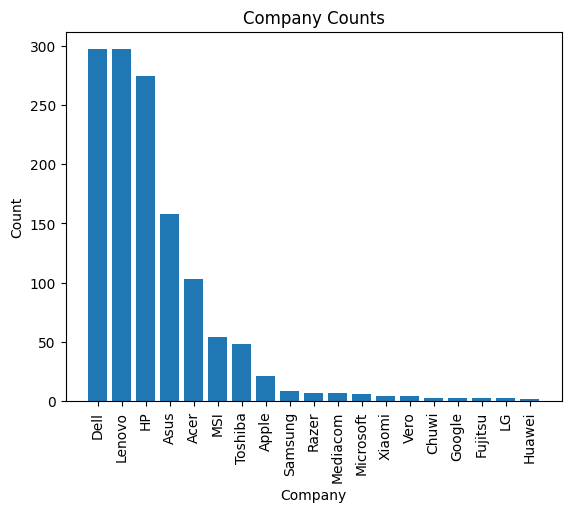

In [ ]:
company_counts = df['Company'].value_counts()
plt.bar(company_counts.index, company_counts.values)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Company Counts')
plt.xticks(rotation=90)
plt.show()

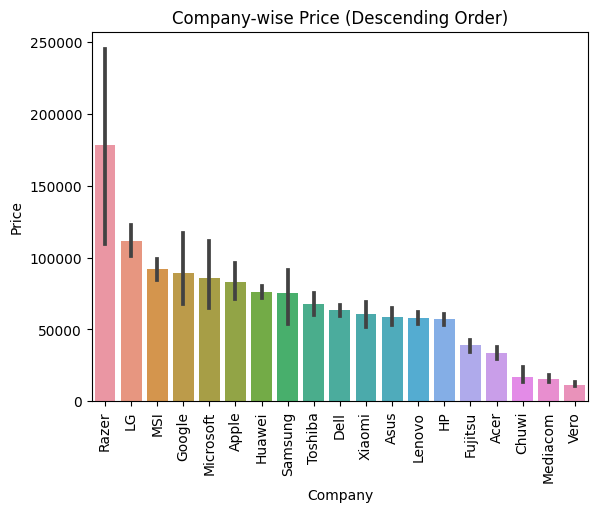

In [ ]:
# Sort the DataFrame by 'Price' in descending order and get the order
order = df.groupby('Company')['Price'].mean().sort_values(ascending=False).index

# Create a bar plot with the specified order
sns.barplot(x='Company', y='Price', data=df, order=order)
plt.xticks(rotation='vertical')
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Company-wise Price (Descending Order)')
plt.show()


We can see here the company wise expensive laptops from Razer to Vero.

<Axes: >

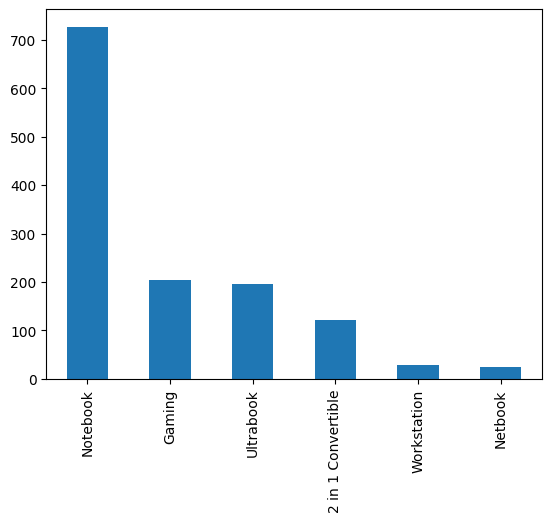

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

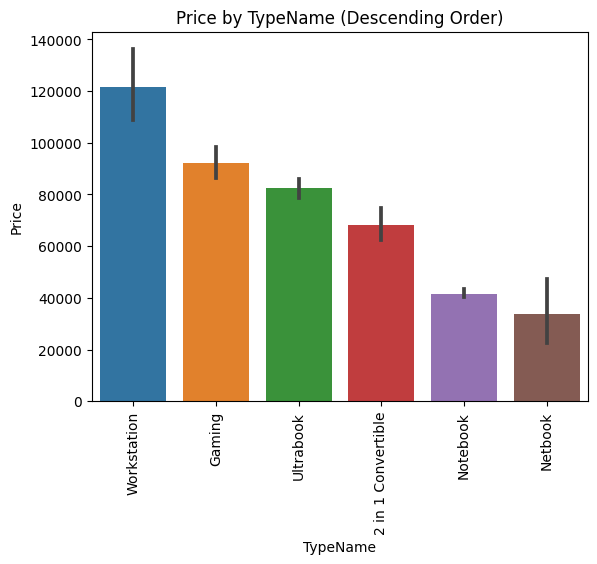

In [ ]:
# Calculate the mean 'Price' for each 'TypeName' and sort in descending order
sorted_typenames = df.groupby('TypeName')['Price'].mean().sort_values(ascending=False).index

# Create a bar plot with the sorted order
sns.barplot(x='TypeName', y='Price', data=df, order=sorted_typenames)
plt.xticks(rotation='vertical')
plt.xlabel('TypeName')
plt.ylabel('Price')
plt.title('Price by TypeName (Descending Order)')
plt.show()

By seeing both the above graphs, we can conclude that the Notebook is most buying because it is bughet friendly for common people.

<ipython-input-125-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

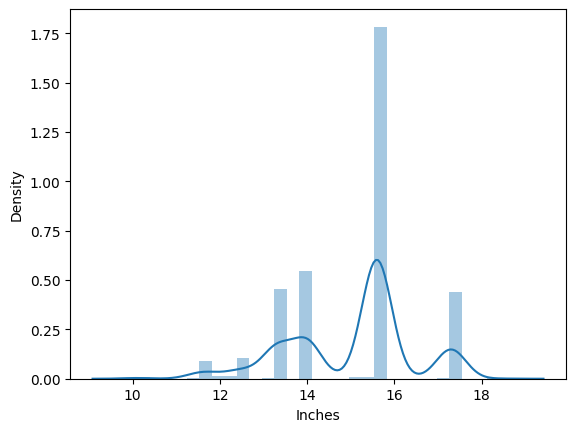

In [ ]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

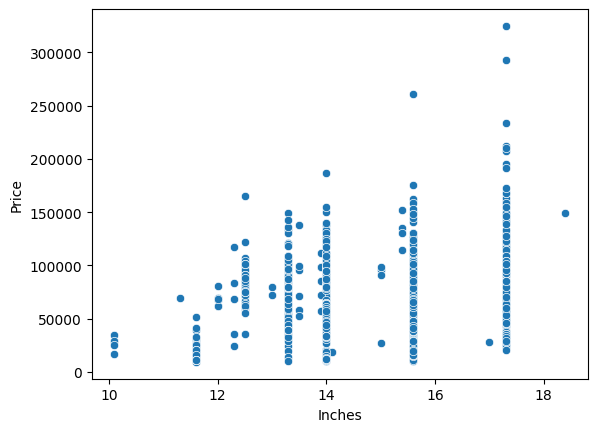

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Here, we can see that most or the information is hidden in this column like the screen size, displayu type, touchscreen or not, etc
so, we need to extract all info in different columns.

In [ ]:
# extract touchscreen info in one column
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
73,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,58341.60,0
1201,Lenovo,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,8,500GB HDD,Nvidia GeForce 920MX,No OS,2.20,33513.12,0
898,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M420X,Windows 10,2.18,32713.92,0
816,Razer,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,95850.72,1
1104,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,63882.72,0


<Axes: >

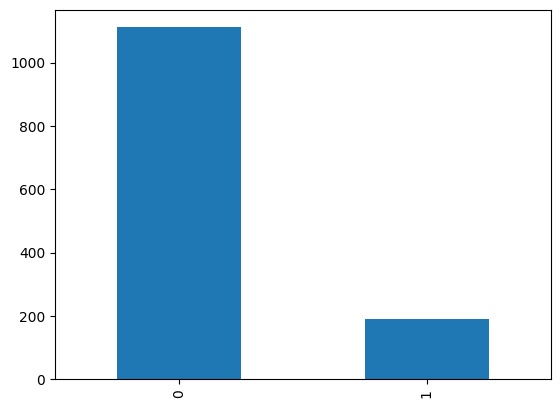

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar')

The laptops without touchscreen is purchasing mostly.
Let's find the reason for this by checking the relation with price.

<Axes: xlabel='Touchscreen', ylabel='Price'>

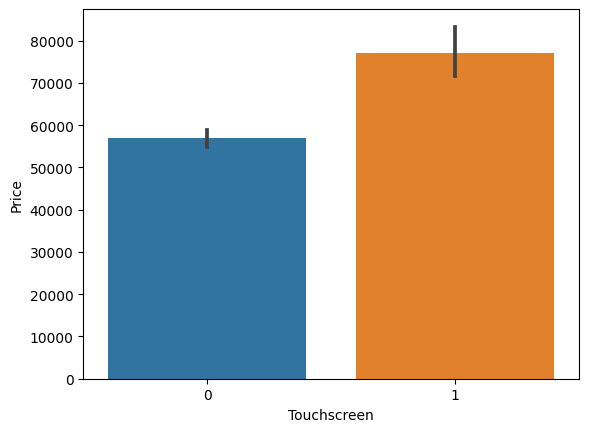

In [ ]:
# draw bar graph

sns.barplot(x=df['Touchscreen'],y=df['Price'])

now, we have found that touch screen laptops are purchasing less because it has high price.

Extract the 'display panel type' info in another column means the display have IPS panel or not.

In [ ]:
#Extract IPS column

df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: >

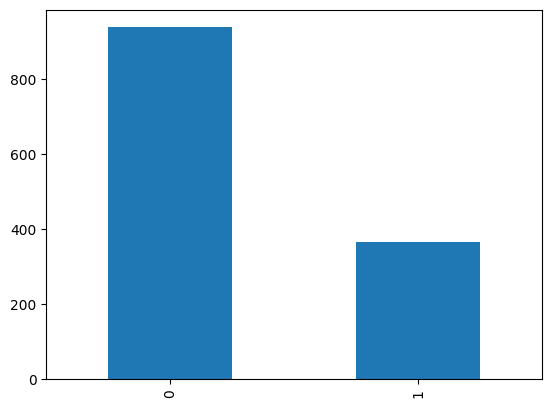

In [ ]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

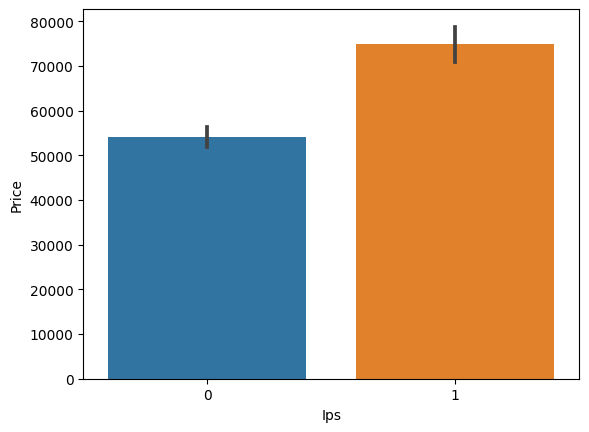

In [ ]:
sns.barplot(x=df['Ips'],y=df['Price'])

Here, also we can see that IPS display have high price that's why people purchasing it less.

Now, Extract another columns havingb info for screen resolution in two parts (length x breadth).

In [ ]:
# extract two new column with resolution info

new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_screen'] = new[0]
df['Y_screen'] = new[1]

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_screen,Y_screen
1129,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,60153.1200,0,1,IPS Panel Full HD 1920,1080
1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,1366,768
1060,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,57009.6000,0,0,Full HD 1920,1080
1225,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,2.65,16463.5200,0,0,1366,768
80,Dell,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,58403.4048,0,1,IPS Panel Full HD 1920,1080


The column 'Y_screen' is good but the column 'X_screen' have some noisy texts so, we need to remove it.

In [ ]:
# clean the column 'X_res' by using regex

df['X_screen'] = df['X_screen'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_screen,Y_screen
956,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.24,101178.72,1,0,1920,1080
1188,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Linux,1.23,58554.72,1,0,3200,1800
568,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4,500GB HDD,Intel HD Graphics 505,Windows 10,2.20,18328.32,0,0,1920,1080
364,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,256GB SSD,Nvidia GeForce 920MX,No OS,2.20,26586.72,0,0,1366,768
401,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.90,81465.12,0,0,1920,1080


In [ ]:
# convert datatype on int

df['X_screen'] = df['X_screen'].astype('int')
df['Y_screen'] = df['Y_screen'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_screen          1303 non-null   int64  
 14  Y_screen          1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [ ]:
df.corr()['Price']

<ipython-input-142-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_screen       0.556529
Y_screen       0.552809
Name: Price, dtype: float64

We can see here the relation of different features with price.

Construct another column for parts per inch 'ppi' with combining three column X_screen, Y_screen, Inches

In [ ]:
# construction another column of ppi

df['ppi'] = (((df['X_screen']**2) + (df['Y_screen']**2))**0.5/df['Inches']).astype('float')

In [ ]:
df.corr()['Price']

<ipython-input-144-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_screen       0.556529
Y_screen       0.552809
ppi            0.473487
Name: Price, dtype: float64

In [ ]:
# remove screen resolution column

df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_screen,Y_screen,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


Now, we can remove all three column through which we construct column 'ppi' because all infor of these columns now represented by this ppi column.

In [ ]:
# drop columns Inches, X_screen, Y_screen

df.drop(columns=['Inches','X_screen','Y_screen'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

We can see here, that Cpu column contains many informations like intel type, speed,AMD, etc
So, we will extract all info indivisually in different columns.

In [ ]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

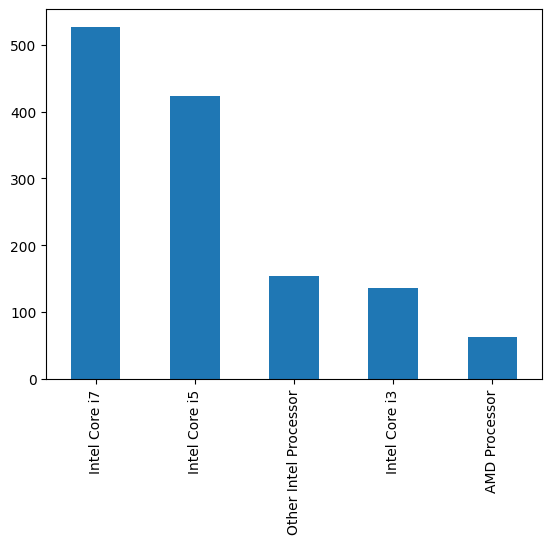

In [ ]:
df['Cpu brand'].value_counts().plot(kind='bar')

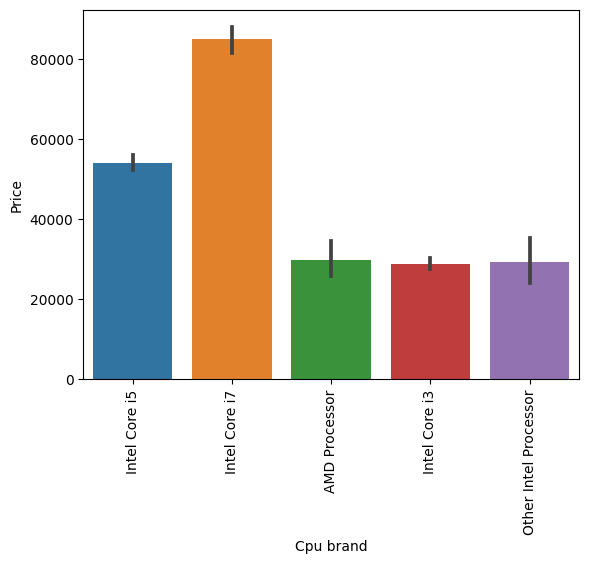

In [ ]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# drop column cpu, cpu name

df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: >

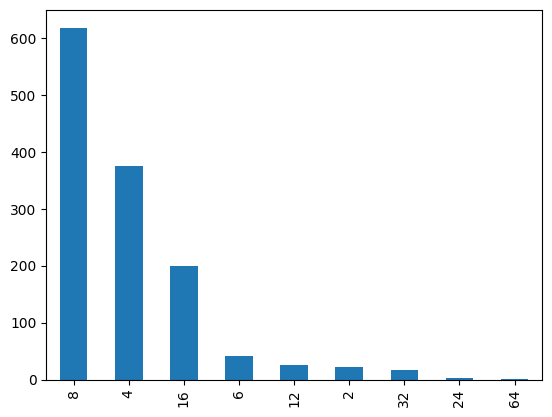

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

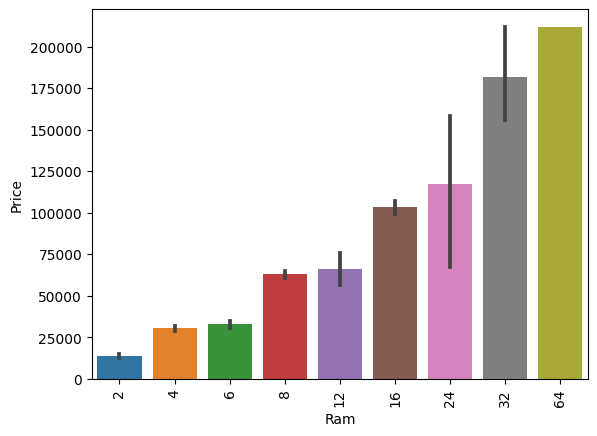

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
# Remove '.0' and 'GB' from the 'Memory' column, and replace 'TB' with '000'
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split the 'Memory' column into 'first' and 'second' based on '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract 'first' and 'second' parts, and strip whitespace from 'first'
df["first"] = new[0]
df["first"] = df["first"].str.strip()
df["second"] = new[1]

# Create binary columns for different memory types in 'first'
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'first'
df['first'] = df['first'].str.replace(r'\D', '')

# Fill missing values in 'second' with "0"
df["second"].fillna("0", inplace=True)

# Create binary columns for different memory types in 'second'
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'second'
df['second'] = df['second'].str.replace(r'\D', '')

# Convert 'first' and 'second' columns to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Calculate the total storage for each memory type
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)


<ipython-input-162-98bca2929883>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-162-98bca2929883>:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [ ]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
439,Asus,Notebook,4,256 SSD,Intel HD Graphics 620,Linux,2.00,29783.520,0,0,141.211998,Intel Core i5,0,256,0,0
779,Asus,Notebook,8,128 SSD,Intel HD Graphics 505,Windows 10,2.00,31003.632,0,0,141.211998,Other Intel Processor,0,128,0,0
1160,Lenovo,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 7,1.70,79866.720,0,0,157.350512,Intel Core i7,0,256,0,0
32,HP,Notebook,4,500 HDD,AMD Radeon 530,Windows 10,2.71,23389.920,0,0,127.335675,AMD Processor,500,0,0,0
469,Lenovo,Ultrabook,12,256 SSD,Intel HD Graphics 520,Windows 10,1.40,98994.240,0,1,209.800683,Intel Core i7,0,256,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
df.corr()['Price']

<ipython-input-166-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

Now, extract gpu info in indivisuall columns.

In [ ]:
# construct gpu brand column

df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [ ]:
# remove the row which have gpu brand as ARM because it has only one value

df = df[df['Gpu brand'] != 'ARM']

In [ ]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

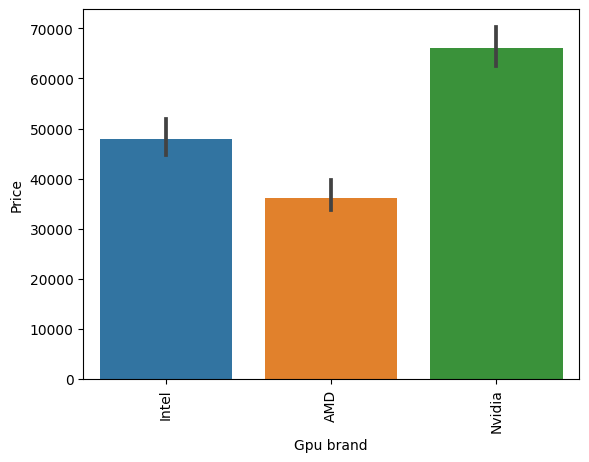

In [ ]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

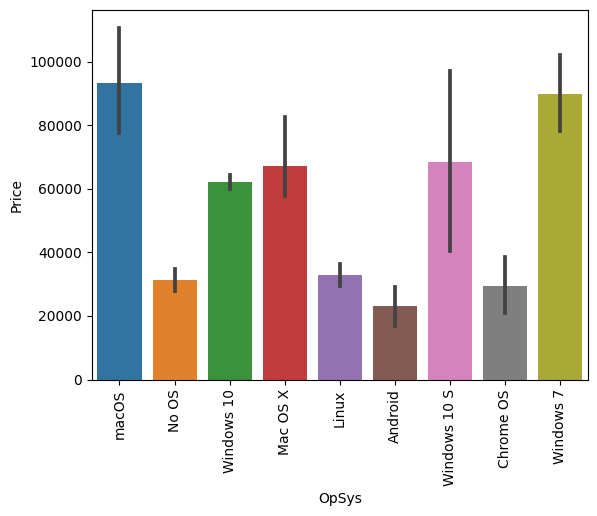

In [ ]:
# draw graph to represent relation between os and price

sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Define a function to categorize operating systems
def cat_os(inp):
    # Check if the input matches Windows operating systems
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    # Check if the input matches macOS variations
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    # If the input doesn't match any known operating systems, categorize as 'Others/No OS/Linux'
    else:
        return 'Others/No OS/Linux'


In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
df.drop(columns=['OpSys'],inplace=True)

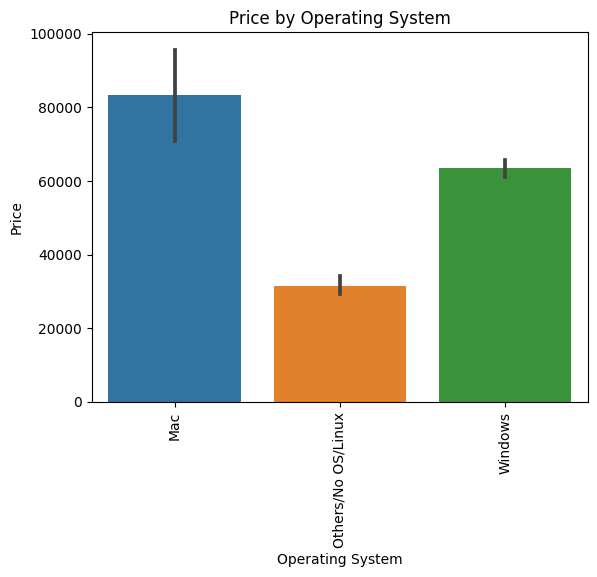

In [ ]:
# Create a bar plot using the 'os' column for x-axis and 'Price' column for y-axis
sns.barplot(x='os', y='Price', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.title('Price by Operating System')
plt.show()

<ipython-input-185-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

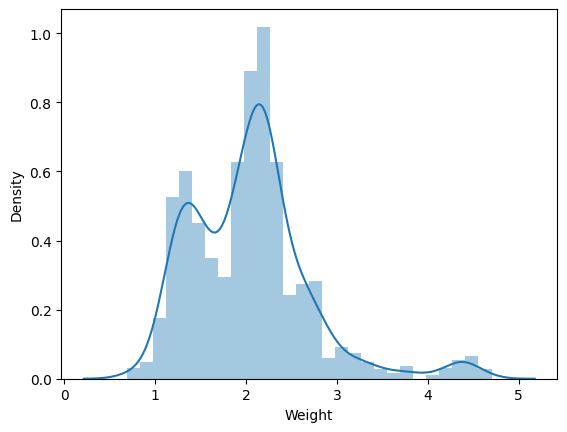

In [ ]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

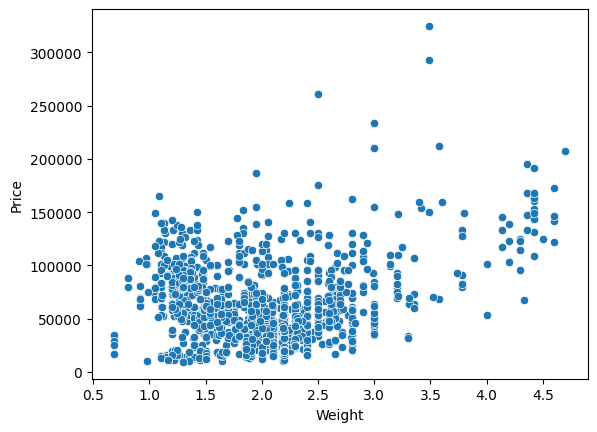

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df.corr()['Price']

<ipython-input-187-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<ipython-input-188-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

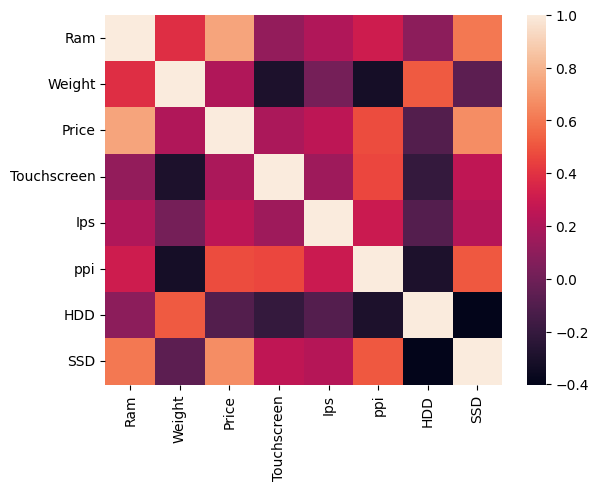

In [ ]:
sns.heatmap(df.corr())

<ipython-input-189-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

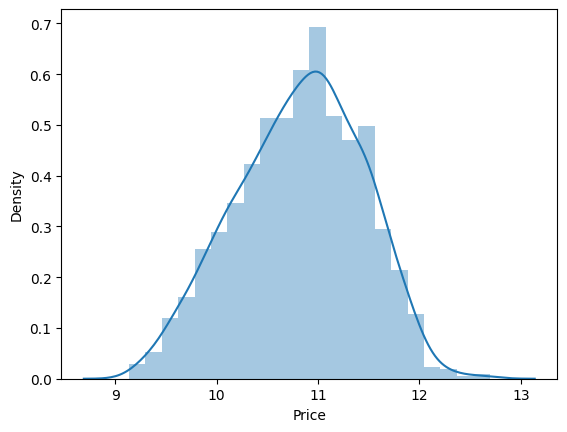

In [ ]:
sns.distplot(np.log(df['Price']))

## Step 5: Model Selection, Training & Evaluation

Now that we have a clean and well-structured dataset, it's time to build our laptop price prediction model.

In [ ]:
df.sample(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
369,HP,Ultrabook,8,1.36,93240.00,0,1,157.350512,Intel Core i7,0,256,Intel,Windows
477,Lenovo,Notebook,8,1.70,72673.92,0,0,157.350512,Intel Core i5,0,180,Intel,Windows
941,Asus,Notebook,4,2.80,28238.40,0,0,106.113062,Other Intel Processor,1000,0,Nvidia,Windows
740,Dell,Notebook,8,2.00,64308.96,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
810,HP,Gaming,12,3.74,93186.72,0,1,127.335675,Intel Core i7,1000,0,AMD,Windows
265,Dell,2 in 1 Convertible,8,2.67,42570.72,1,0,141.211998,Intel Core i5,0,256,Intel,Windows
182,Lenovo,2 in 1 Convertible,16,1.40,98514.72,1,1,316.965060,Intel Core i7,0,512,Intel,Windows
1180,Lenovo,2 in 1 Convertible,8,1.36,87219.36,1,1,209.800683,Intel Core i5,0,256,Intel,Windows
341,Lenovo,Notebook,12,2.20,47898.72,0,0,141.211998,AMD Processor,2000,0,AMD,Windows
1196,Lenovo,Notebook,4,1.90,19607.04,0,0,100.454670,Intel Core i3,1000,0,AMD,Others/No OS/Linux


### Data Preprocessing:

Handle missing values, if any.
Encode categorical variables (e.g., 'Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os') using techniques like one-hot encoding or label encoding.

Split the dataset into features (X) and the target variable (y), where 'Price' is the target variable.

In [ ]:
# Encode categorical variables using one-hot encoding

df = pd.get_dummies(df, columns=['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], drop_first=True)


### 1.Data Splitting:

To evaluate the performance of our model, we'll start by splitting the dataset into two parts: a training set and a testing set. Common splits include 85:15, where the training set is used to train the model, and the testing set is used to assess its accuracy.

In [ ]:
# split x and y

X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
X

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1299,16,1.30,1,1,276.053530,0,512,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1300,2,1.50,0,0,111.935204,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1301,6,2.19,0,0,100.454670,1000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [ ]:
# split data using train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
X_train

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
183,8,2.00,0,0,100.454670,0,128,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1141,8,2.40,0,0,141.211998,1000,128,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1049,4,1.20,0,0,135.094211,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
1020,4,2.08,1,1,141.211998,1000,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
878,4,2.18,0,0,141.211998,1000,128,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,4,2.20,0,0,100.454670,500,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
299,16,1.63,0,0,141.211998,0,512,0,1,0,...,1,0,0,0,1,0,0,1,0,1
493,8,2.20,0,0,100.454670,1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
527,8,2.20,0,0,100.454670,2000,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


### 2. Algorithm Selection:

Choosing the right machine learning algorithm is crucial. Given that we're dealing with a regression problem (predicting laptop prices), we can consider algorithms such as Linear Regression, Decision Trees, Random Forest, or Gradient Boosting. We may even experiment with multiple algorithms to find the best performer.

### Linear regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.210178279764286
Root Mean Squared Error (RMSE): 0.27149030728622275
R-squared (R²) Score: 0.8073277448418607


### Descision Trees

In [ ]:
# Initialize the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.1941244039707705
Root Mean Squared Error (RMSE): 0.26602929329551367
R-squared (R²) Score: 0.8150009730921924


### Random Forest

In [ ]:
# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.1563900454545782
Root Mean Squared Error (RMSE): 0.20892174422021742
R-squared (R²) Score: 0.8859020586854273


### Gradient Boosting

In [ ]:
# Initialize the Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)  # You can adjust the hyperparameters

# Fit the model on the training data
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.1751519070132622
Root Mean Squared Error (RMSE): 0.22490547868407226
R-squared (R²) Score: 0.867775908279415


### Now, Let's make a Model Evaluation Metrics using all four models we have choosen.

In [ ]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=["Model", "MAE", "RMSE", "R-squared"])

# Iterate through models and calculate metrics
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Append metrics to the DataFrame
    metrics_df = metrics_df.append({"Model": model_name, "MAE": mae, "RMSE": rmse, "R-squared": r2}, ignore_index=True)


<ipython-input-221-f1f1f3feb4f5>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({"Model": model_name, "MAE": mae, "RMSE": rmse, "R-squared": r2}, ignore_index=True)
<ipython-input-221-f1f1f3feb4f5>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({"Model": model_name, "MAE": mae, "RMSE": rmse, "R-squared": r2}, ignore_index=True)
<ipython-input-221-f1f1f3feb4f5>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({"Model": model_name, "MAE": mae, "RMSE": rmse, "R-squared": r2}, ignore_index=True)
<ipython-input-221-f1f1f3feb4f5>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [ ]:
metrics_df

,Model,MAE,RMSE,R-squared
0,Linear Regression,0.210178,0.271490,0.807328
1,Decision Tree,0.194124,0.266029,0.815001
2,Random Forest,0.156390,0.208922,0.885902
3,Gradient Boosting,0.175152,0.224905,0.867776


### Based on these metrics, it appears that the Random Forest model has the lowest MAE and RMSE and the highest R-squared score, indicating that it is performing the best among the models you've tested. The Random Forest model is likely a good choice for your laptop price prediction task.

### Hyperparameter Tunning

In [ ]:
# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best Model Hyperparameters: {best_params}")
print(f"Best Model MAE: {mae}")
print(f"Best Model RMSE: {rmse}")
print(f"Best Model R-squared: {r2}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Model Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model MAE: 0.1490200325244675
Best Model RMSE: 0.1979006524007778
Best Model R-squared: 0.8976223929262654


### Here's how you can train the final Random Forest model with the best hyperparameters:

In [ ]:
# Create the final Random Forest Regressor with the best hyperparameters
final_rf = RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Train the final model on the entire training dataset
final_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_rf.predict(X_test)

# Evaluate the final model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Final Model MAE: {mae}")
print(f"Final Model RMSE: {rmse}")
print(f"Final Model R-squared: {r_squared}")

Final Model MAE: 0.1490200325244675
Final Model RMSE: 0.1979006524007778
Final Model R-squared: 0.8976223929262654


### Now, We have a well-trained model, we can use it to make price predictions for laptops based on their specifications and features.